## Pull Covid-19 data from an excel spreadsheet

### Inspired by:
#### [https://www.twilio.com/blog/2017/02/an-easy-way-to-read-and-write-to-a-google-spreadsheet-in-python.html](https://www.twilio.com/blog/2017/02/an-easy-way-to-read-and-write-to-a-google-spreadsheet-in-python.html)
#### and
#### [https://code.sololearn.com/c4gmt97Se5f9/?ref=app](https://code.sololearn.com/c4gmt97Se5f9/?ref=app)

In [1]:
# gspread and oauth2client are necessary
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Use creds to create a client to interact with the Google Drive API
scope = [
    'https://spreadsheets.google.com/feeds',
    'https://www.googleapis.com/auth/spreadsheets',
    "https://www.googleapis.com/auth/drive.file",
    "https://www.googleapis.com/auth/drive",
]

creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)
client = gspread.authorize(creds)

sheet = client.open('Denmark Covid-19 Data').get_worksheet(0)

In [4]:
def convert_to_int(list):
    return [int(item) for item in list]

def get_range(start_date, end_date, list, date_list):
    start_index = date_list.index(start_date)
    end_index = date_list.index(end_date) + 1
    
    return list[start_index : end_index]

date_full_column = sheet.col_values(1)   # Column A
test_full_column = sheet.col_values(14)  # Column

date_full_column.pop(0)
test_full_column.pop(0)

test_full_column = convert_to_int(test_full_column)

<IPython.core.display.Javascript object>


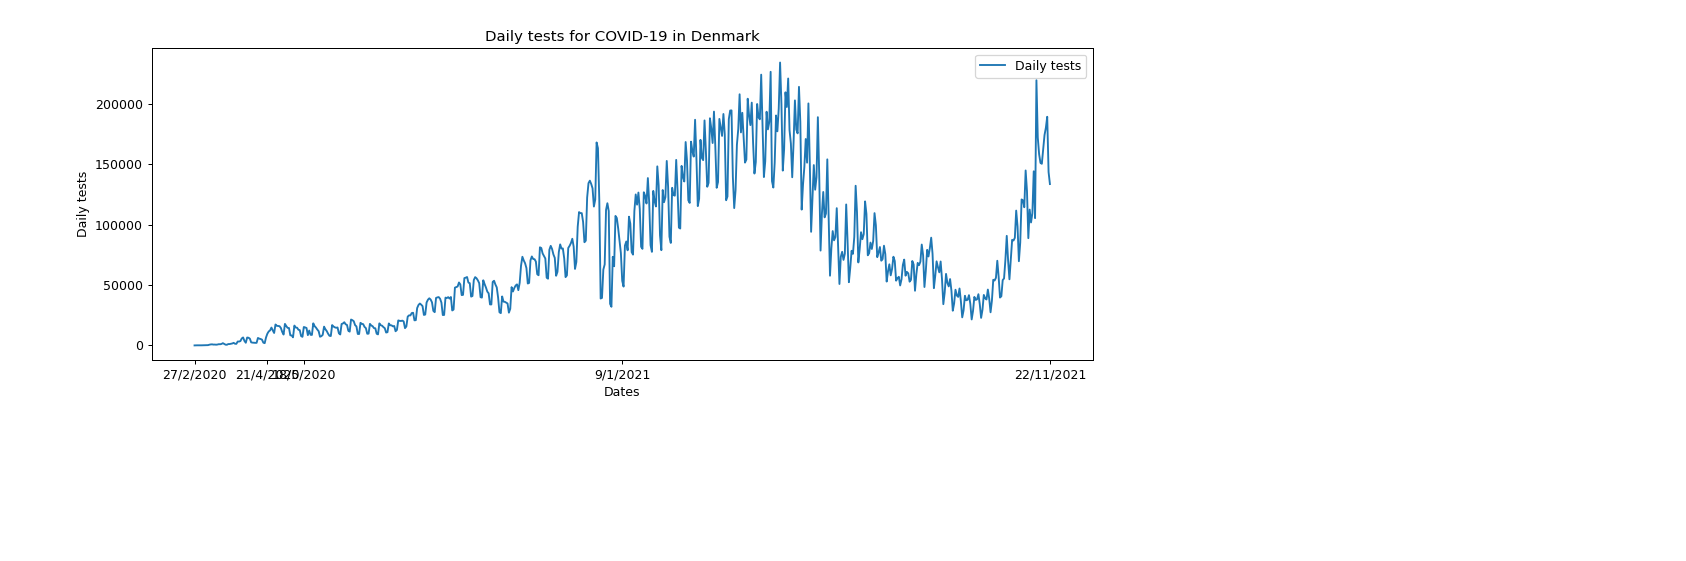

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook

x_ticks = [date_full_column[0], '21/4/2020', '18/5/2020', date_full_column[int(len(date_full_column) / 2)], date_full_column[-1]]

# COVID-19 Tests
plt.figure(figsize = (15, 5))
plt.title('Daily tests for COVID-19 in Denmark')
plt.plot(date_full_column, test_full_column, '-', label = 'Daily tests')
plt.legend()

plt.ylabel('Daily tests')
plt.xlabel('Dates')
plt.xticks(x_ticks)

plt.savefig('./Images/full_tests_whole.png')

<IPython.core.display.Javascript object>


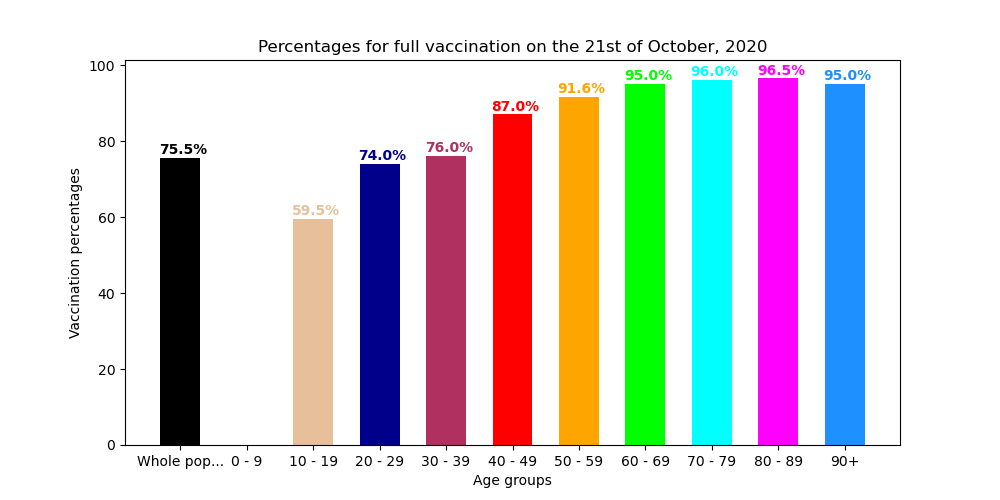

In [65]:
import matplotlib.pyplot as plt
%matplotlib notebook

# Title, color, vaccination percentage, population count
titles = [
    ['Whole pop...', '#000000', 0.755, 5822763],
    ['0 - 9', '#228b22', 0, 614489],
    ['10 - 19', '#e8bf9b', 0.595, 681911],
    ['20 - 29', '#00008b', 0.74, 782701],
    ['30 - 39', '#b03060', 0.76, 686808],
    ['40 - 49', '#ff0000', 0.87, 756048],
    ['50 - 59', '#ffa500', 0.916, 800444],
    ['60 - 69', '#00ff00', 0.95, 663646],
    ['70 - 79', '#00ffff', 0.96, 564390],
    ['80 - 89', '#ff00ff', 0.965, 227298],
    ['90+', '#1e90ff', 0.95, 45027],
]

plt.figure(figsize = (10, 5))
plt.title('Percentages for full vaccination on the 21st of October, 2020')

for title in titles:
    plt.bar(title[0], title[2] * 100, width = 0.6, color = title[1])
    
for i, v in enumerate(titles):
#     print(v[2])
    if (i != 1):
        plt.text(i - 0.32,(v[2] * 100) + 1, str(v[2] * 100)[0:4] + '%', color=v[1], fontweight='bold')
    
#     , fontweight='bold'

plt.ylabel('Vaccination percentages')
plt.xlabel('Age groups')

plt.savefig('./Images/bar_vaccination.png')

plt.show()
